In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import astropy.units as u

# Some plotting config
sns.set(
    context="notebook",
    style="darkgrid",
    font="Times New Roman",
    font_scale=1.75,
)

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams.update({"text.usetex": False})


import fitter
import fitter.visualize as viz

In [2]:
obs = fitter.Observations("NGC0104")

In [3]:
mcmcviz = viz.MCMCVisualizer("47Tuc_sampler.hdf", obs)
m = mcmcviz.get_model()
from fitter.util.units import angular_width

u.set_enabled_equivalencies(angular_width(m.d))

/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/peter/research/GCfit/fitter/probabilities/pulsars.py:445: RuntimeWarning: invalid value encountered in log10
  Pdot_int = np.log10(Pdot_int)
/home/peter/research/GCfit/fitter/probabilities/mass.py:126: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self.polygon = ops.unary_union([geom.Polygon(c).buffer(0)
/home/peter/research/GCfit/fitter/probabilities/mass.py:91: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self._prepped = [prepgeom.prep(p) for p in self.polygon

In [4]:
civiz = mcmcviz.get_CImodel(Nprocesses=6, N=1024, binary_fraction=0.0)

/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/ssptools/evolve_mf_3.py:246: RuntimeWarning: divide by zero encountered in double_scalars
  Aj = Nj / self.Pk(alphaj, 1, m1, mto)
/home/peter/research/GCfit/fitter/visualize/models.py:2168: RuntimeWarning: divide by zero encountered in true_divide
  return mass_MS / mass_tot, mass_rem / mass_tot
/home/peter/research/GCfit/fitter/visualize/models.py:2168: RuntimeWarning: invalid value encountered in true_divide
  return mass_MS / mass_tot, mass_rem / mass_tot
/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/ssptools/evolve_mf_3.py:246: RuntimeWarning: divide by zero encountered in double_scalars
  Aj = Nj / self.Pk(alphaj, 1, m1, mto)
/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/ssptools/evolve_mf_3.py:246: RuntimeWarning: divide by zero encountered in double_scalars
  Aj = Nj / self.Pk(alphaj, 1, m1, mto)
/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/ssptools/evolve_mf_3.py:246: Runt

In [5]:
from astropy.stats import (
    knuth_bin_width,
    bayesian_blocks,
    scott_bin_width,
    freedman_bin_width,
)

In [6]:
knuth_bin_width(civiz.BH_mass)

64.27349440002052

BH Mass: 242.459 solMass + 148.418 solMass - 245.179 solMass
BH Number: 41.367 + 21.685 - 27.292



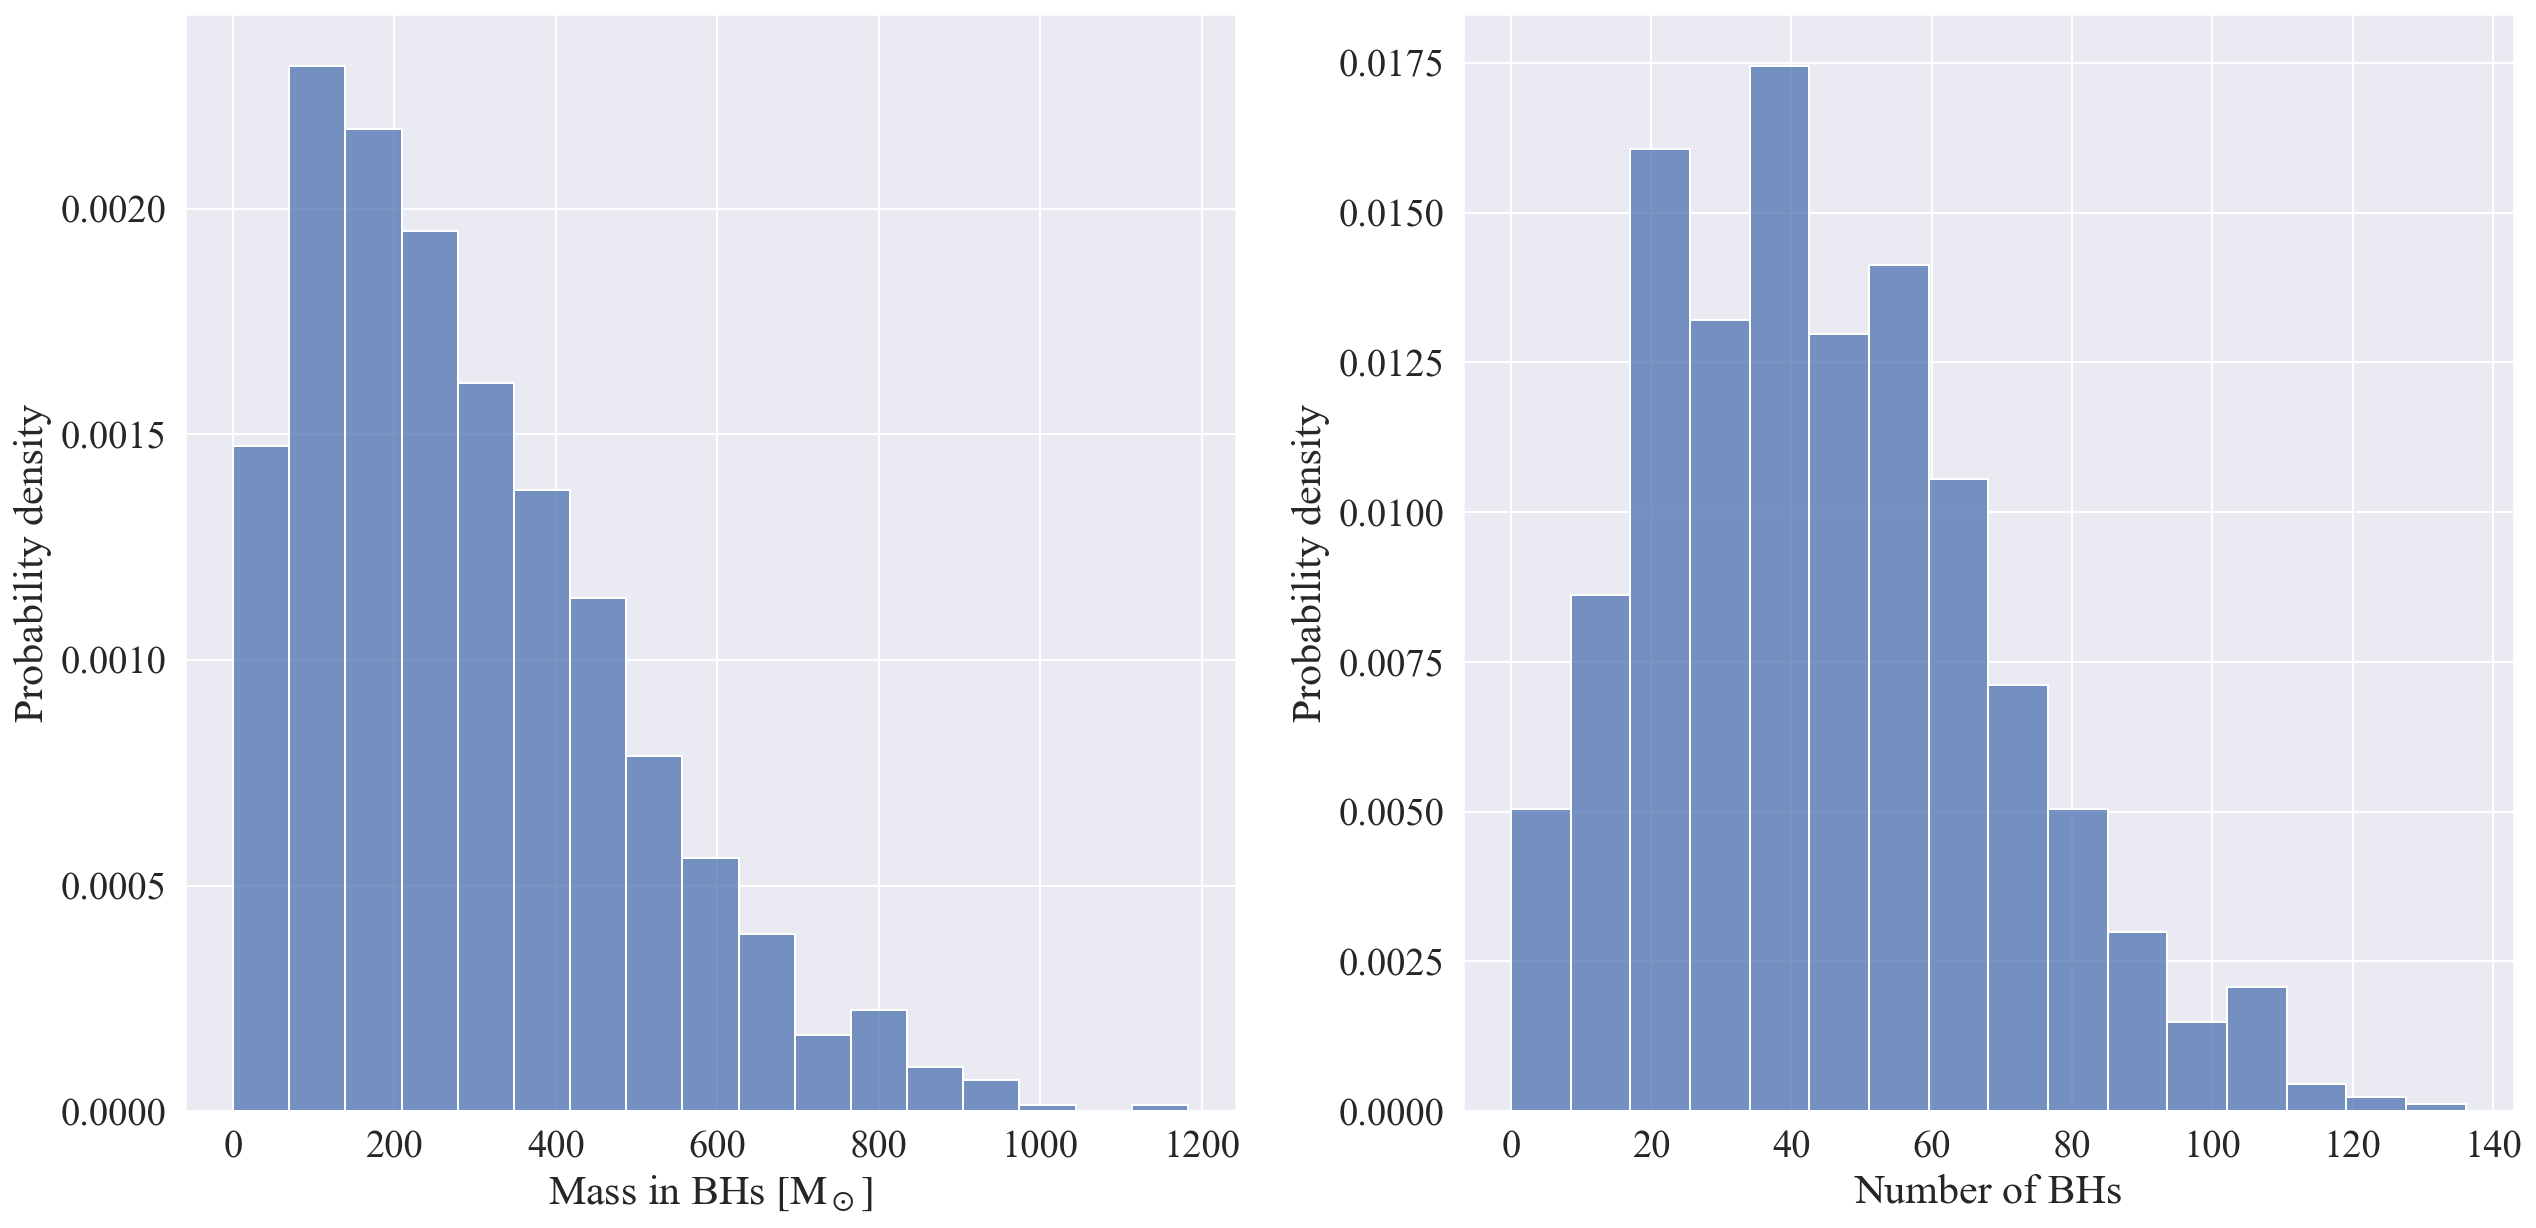

In [24]:
# BH Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

plt.sca(axes[0])
sns.histplot(
    x=civiz.BH_mass, kde=False, stat="density", binwidth=scott_bin_width(civiz.BH_mass)
)
plt.xlabel(r"Mass in BHs $[\mathrm{M}_\odot]$")
plt.ylabel("Probability density")


vals = np.percentile(civiz.BH_mass, [16, 50, 84])
q = np.diff(vals)
print(f"BH Mass: {vals[1]:.3f} + {q[0]:.3f} - {q[1]:.3f}")


plt.sca(axes[1])
sns.histplot(
    x=civiz.BH_num, kde=False, stat="density", binwidth=scott_bin_width(civiz.BH_num)
)
plt.xlabel(r"Number of BHs")
plt.ylabel("Probability density")
fig.tight_layout()

vals = np.percentile(civiz.BH_num, [16, 50, 84])
q = np.diff(vals)
print(f"BH Number: {vals[1]:.3f} + {q[0]:.3f} - {q[1]:.3f}")

fig.savefig("BH_dists.png", bbox_inches="tight", dpi=300)


print()

In [11]:
try:
    # plot Binary Mass
    fig = plt.figure(figsize=(10, 8))
    sns.histplot(
        x=civiz.Bin_mass,
        kde=False,
        stat="density",
        binwidth=scott_bin_width(civiz.Bin_mass),
    )
    plt.xlabel(r"Mass in Binaries $[\mathrm{M}_\odot]$")
    plt.ylabel("Probability density")
    fig.savefig("binary_mass.png", bbox_inches="tight", dpi=300)
except Exception:
    pass

<Figure size 720x576 with 0 Axes>

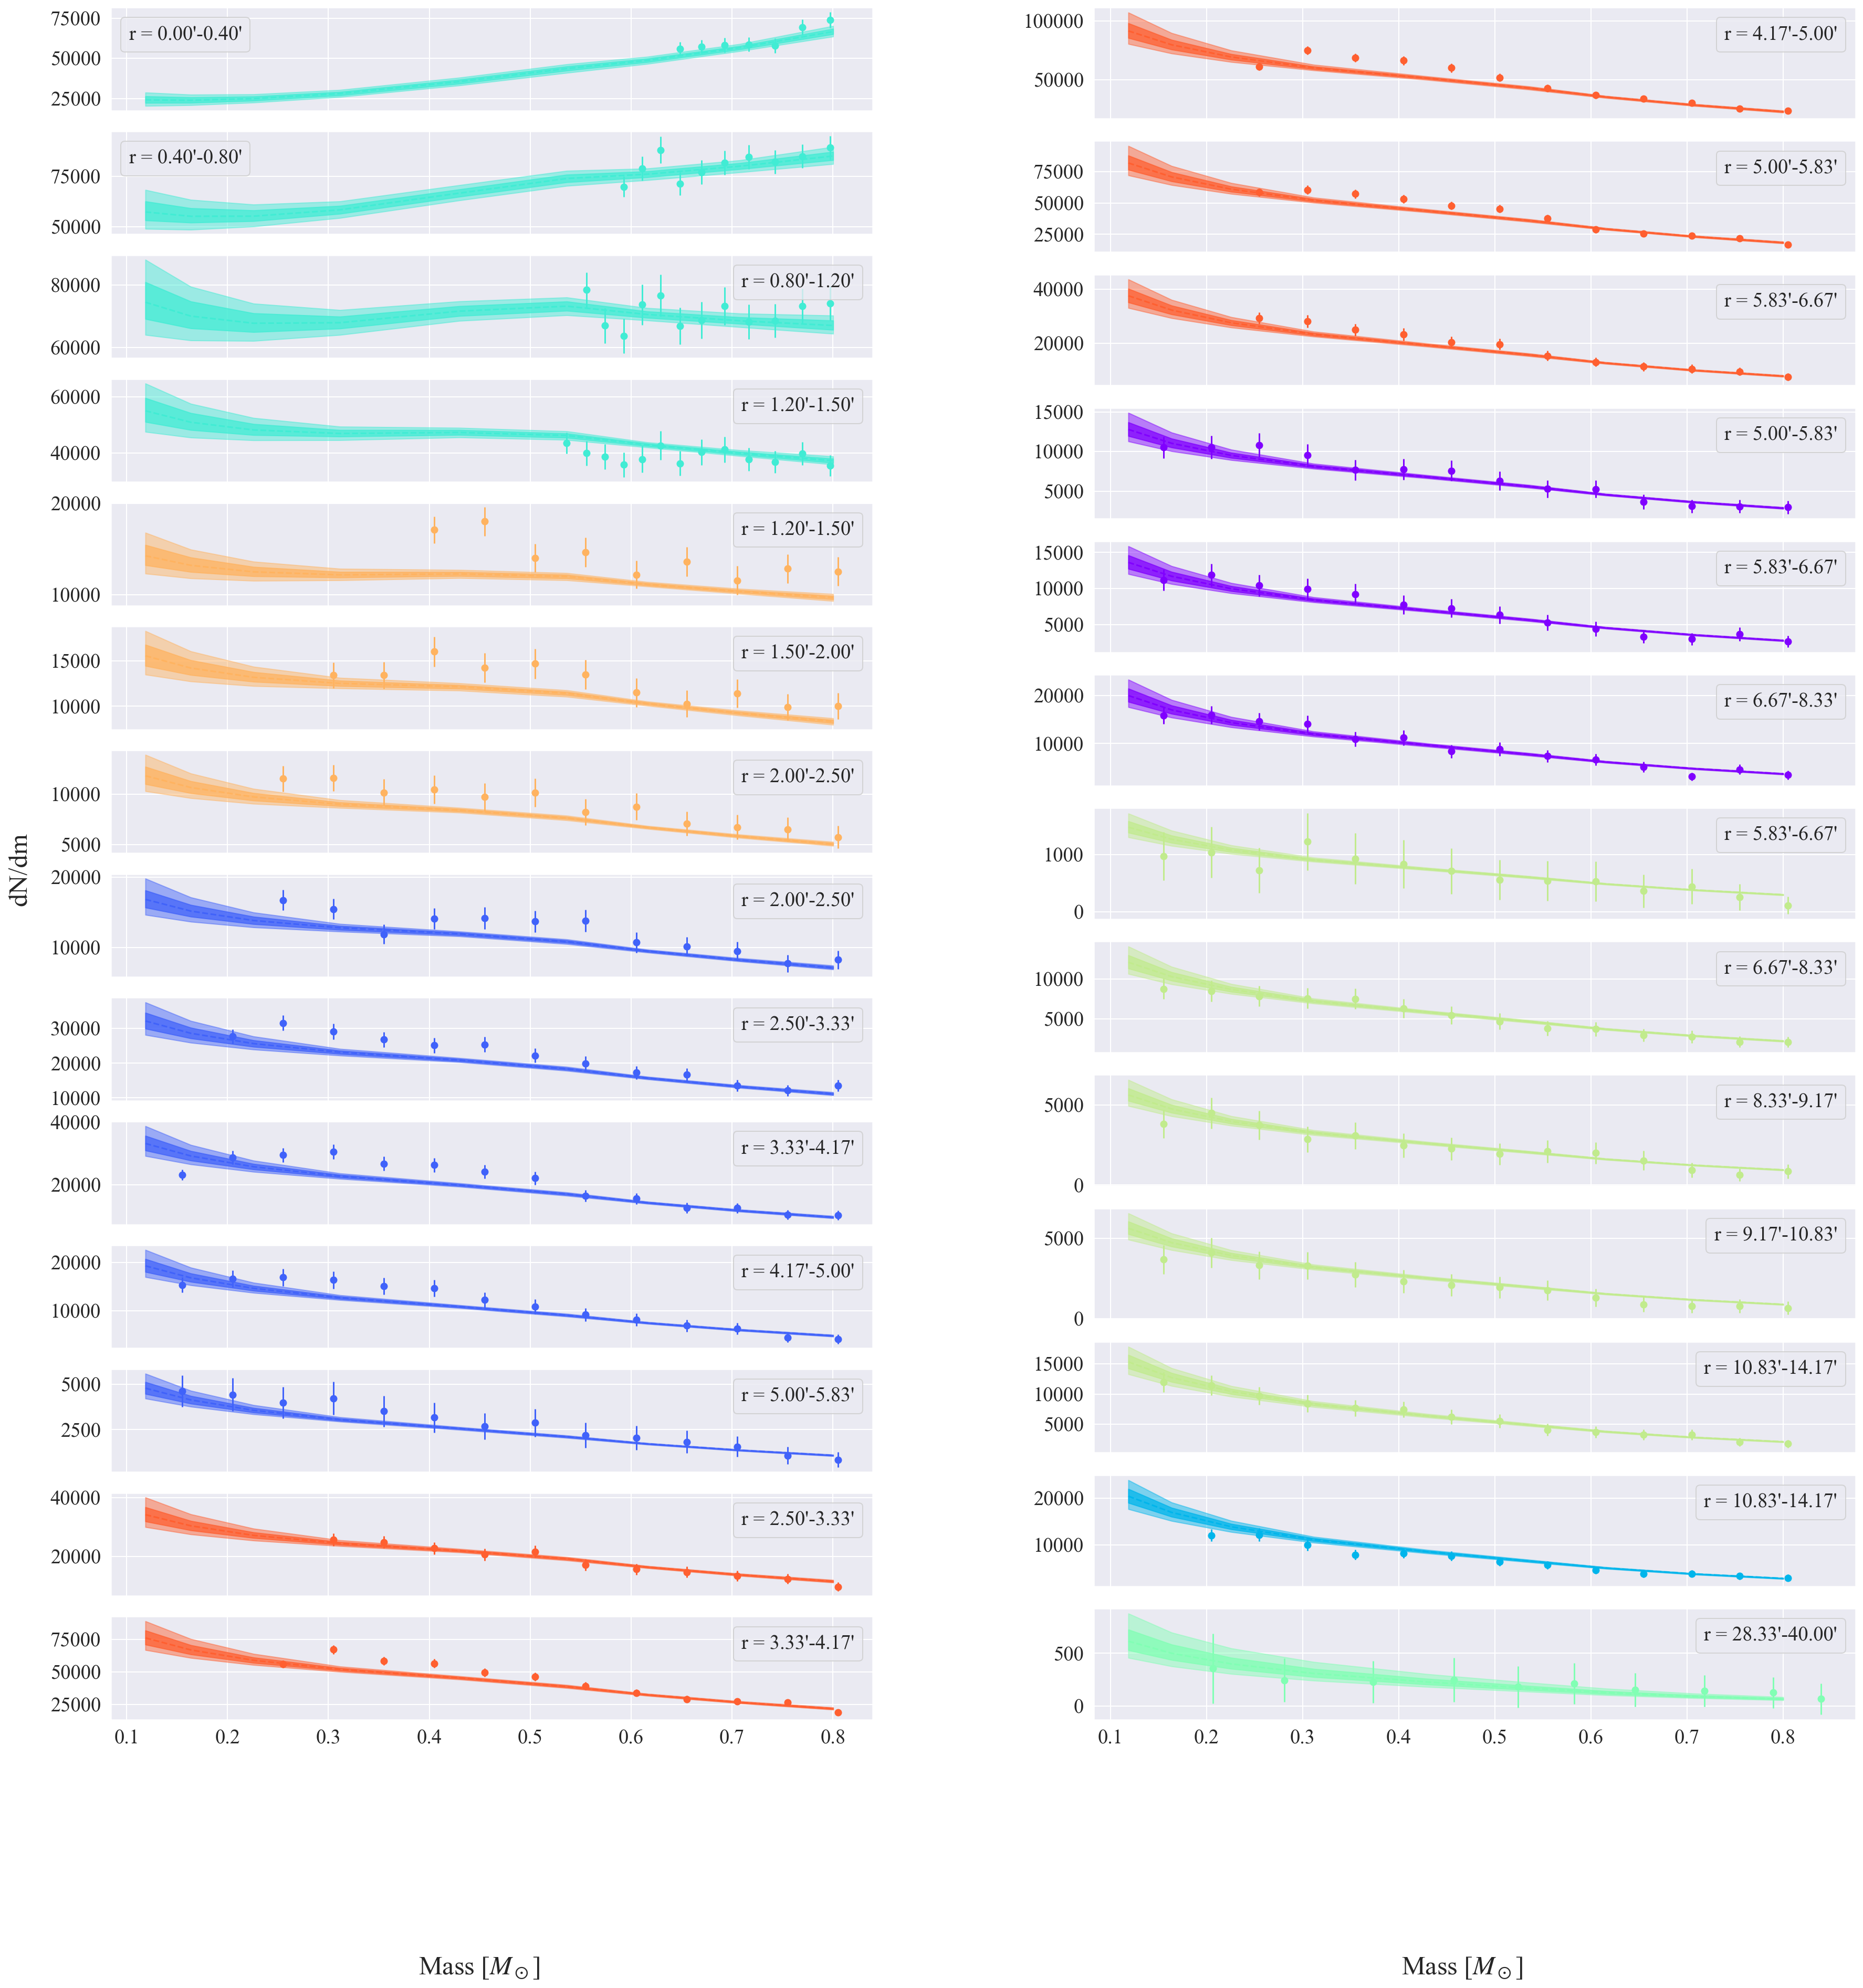

In [12]:
# plot mass function
fig = plt.figure(figsize=(26, 30))
civiz.plot_mass_func(fig=fig, rescaled=False)
# for a in fig.axes:
#     a.set_yscale("log")
#     a.set_xscale("log")
fig.savefig("mass_fun.png", bbox_inches="tight", dpi=300)
plt.show()


# TODO: Figure out how to label the data

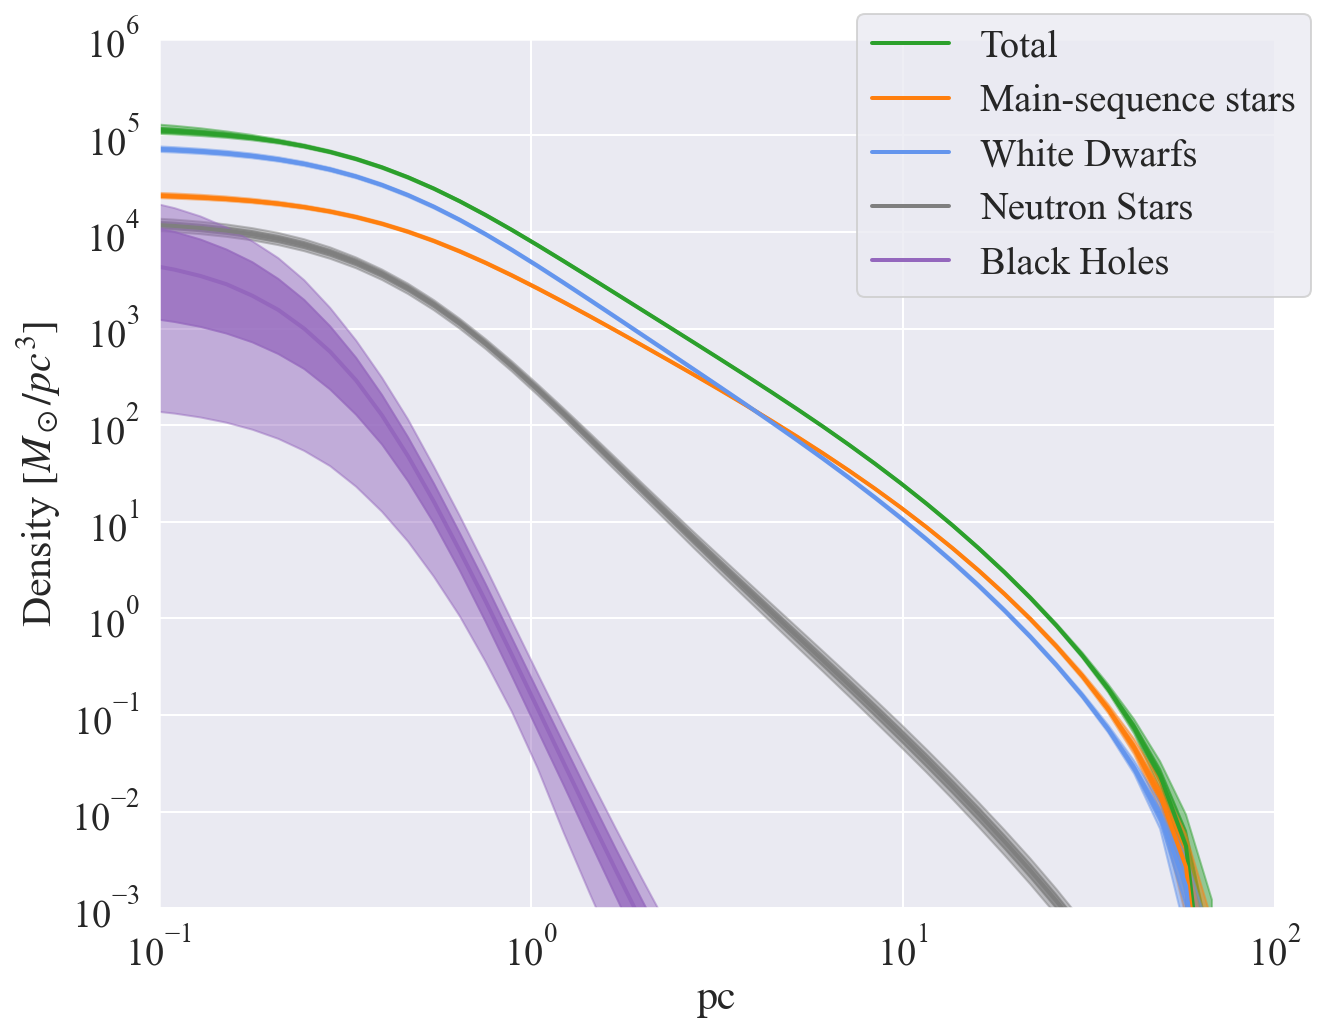

In [13]:
# plot density
fig = plt.figure(figsize=(10, 8))
civiz.plot_density(fig=fig, binaries=False)

plt.legend(loc="upper right", bbox_to_anchor=(1.05, 1.05))
fig.legends = []

plt.xlim(1e-1, 1e2)
plt.ylim(1e-3, 1e6)

fig.savefig("density.png", bbox_inches="tight", dpi=300)


plt.show()

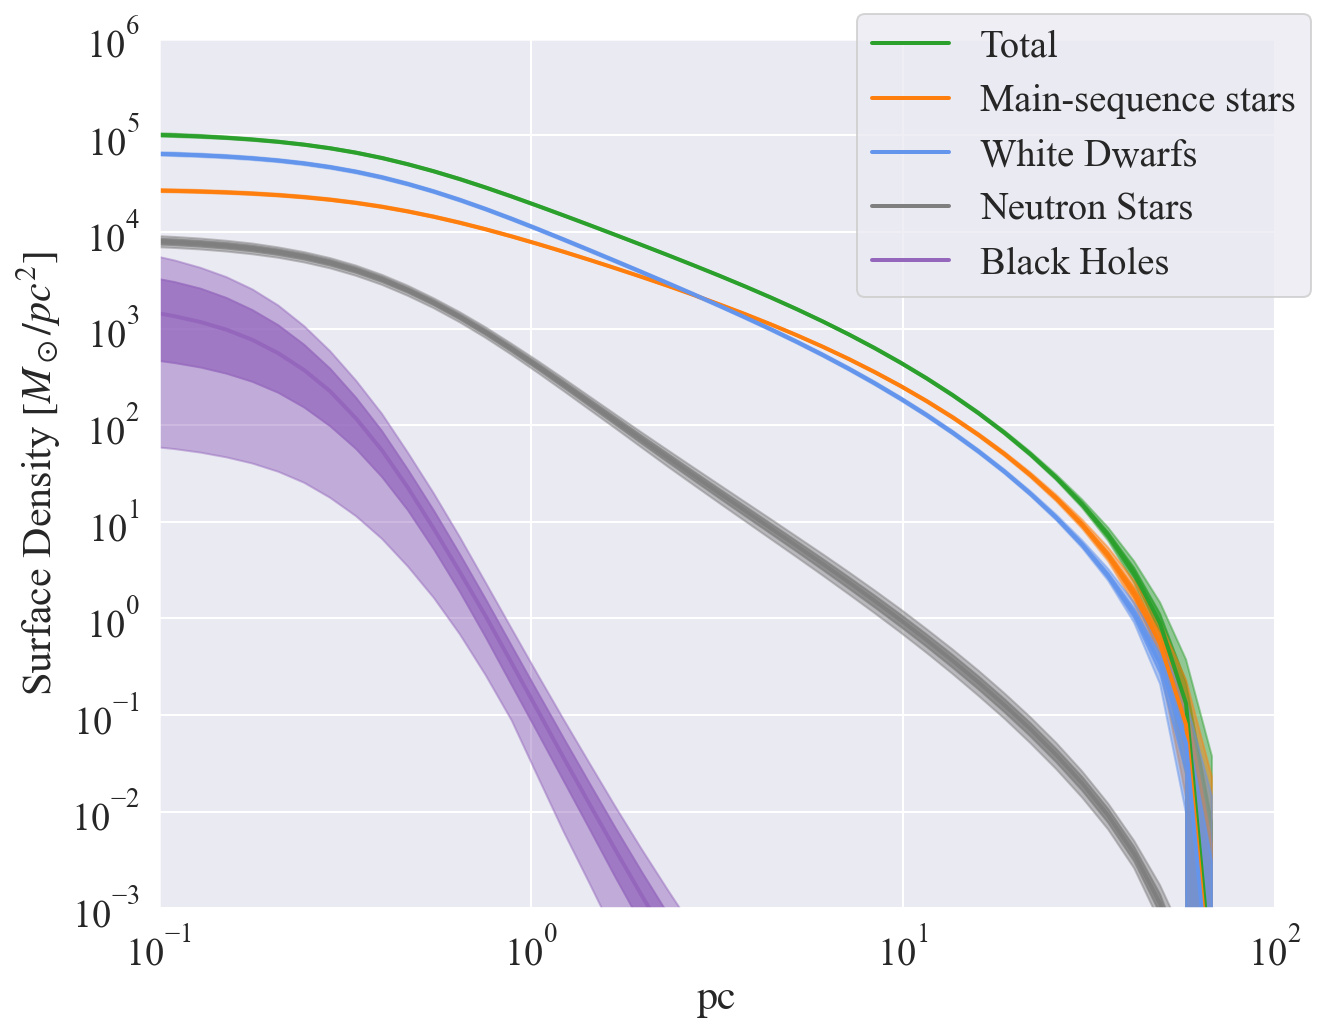

In [14]:
# plot surface density
fig = plt.figure(figsize=(10, 8))
civiz.plot_surface_density(fig=fig, binaries=False)

plt.legend(loc="upper right", bbox_to_anchor=(1.05, 1.05))
fig.legends = []

plt.xlim(1e-1, 1e2)
plt.ylim(1e-3, 1e6)

fig.savefig("surface_dens.png", bbox_inches="tight", dpi=300)


plt.show()

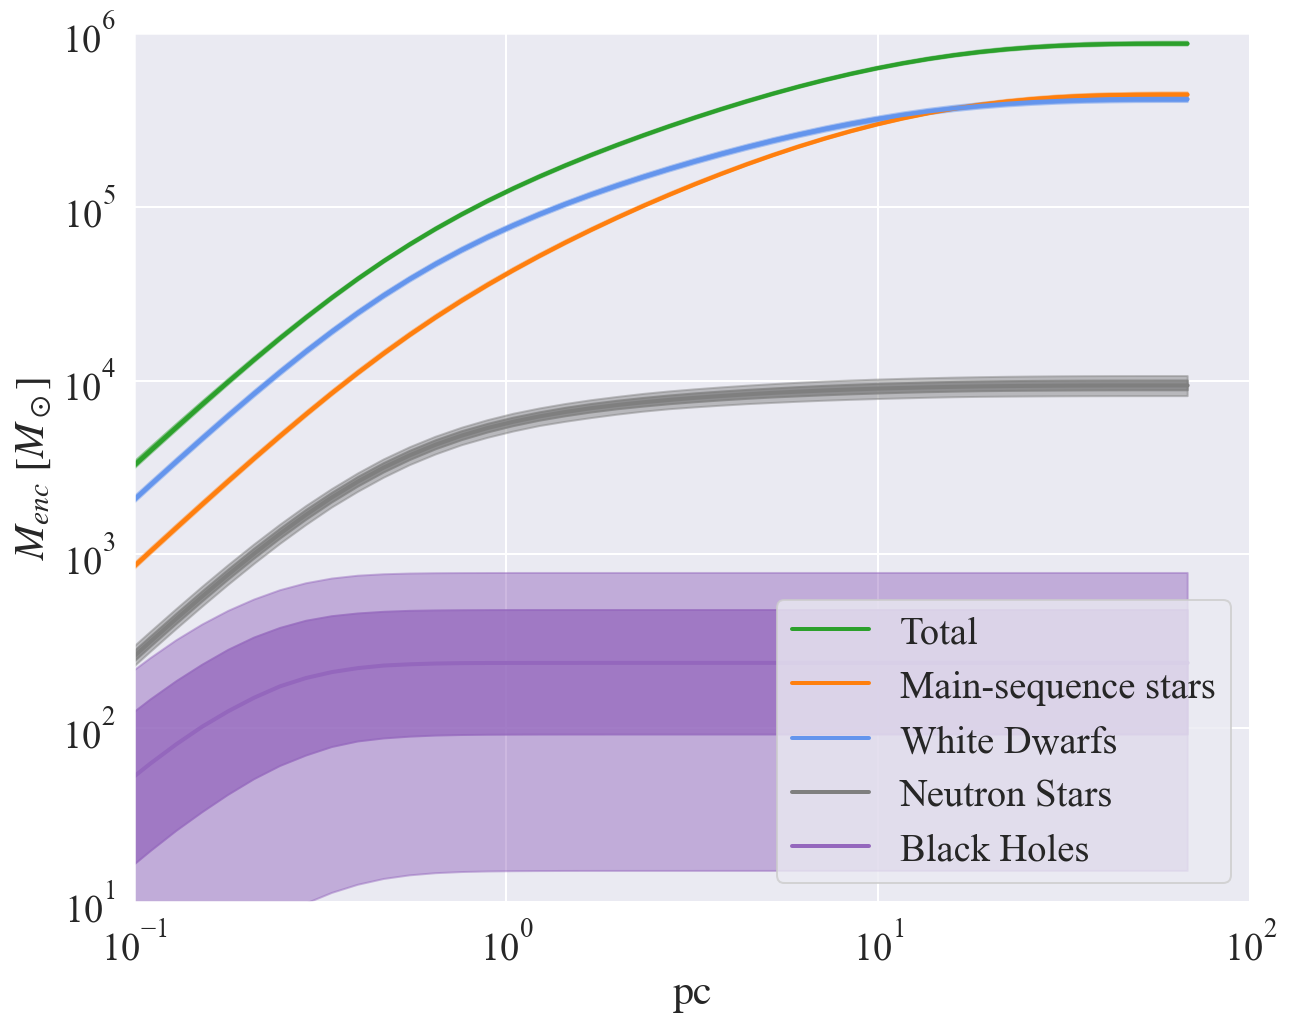

In [15]:
# plot enclosed mass
fig = plt.figure(figsize=(10, 8))
civiz.plot_cumulative_mass(fig=fig, binaries=False)

plt.legend(loc="lower right")
fig.legends = []

plt.xlim(1e-1, 1e2)
plt.ylim(1e1, 1e6)

fig.savefig("mass_enc.png", bbox_inches="tight", dpi=300)


plt.show()

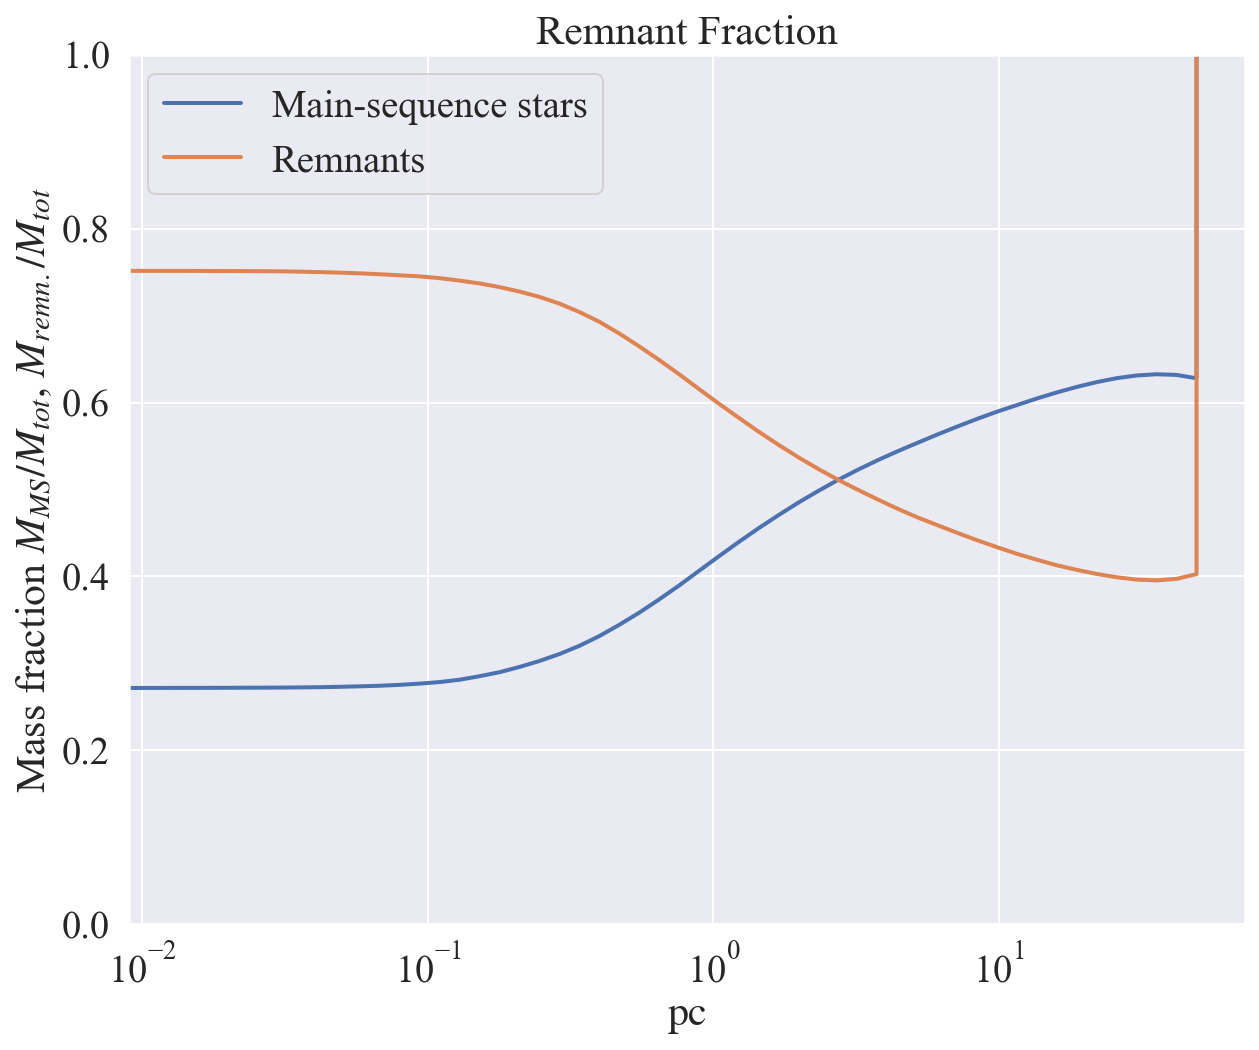

In [16]:
# plot
fig = plt.figure(figsize=(10, 8))
civiz.plot_remnant_fraction(fig=fig)

plt.legend()
fig.legends = []

fig.savefig("remnant_frac.png", bbox_inches="tight", dpi=300)


plt.show()

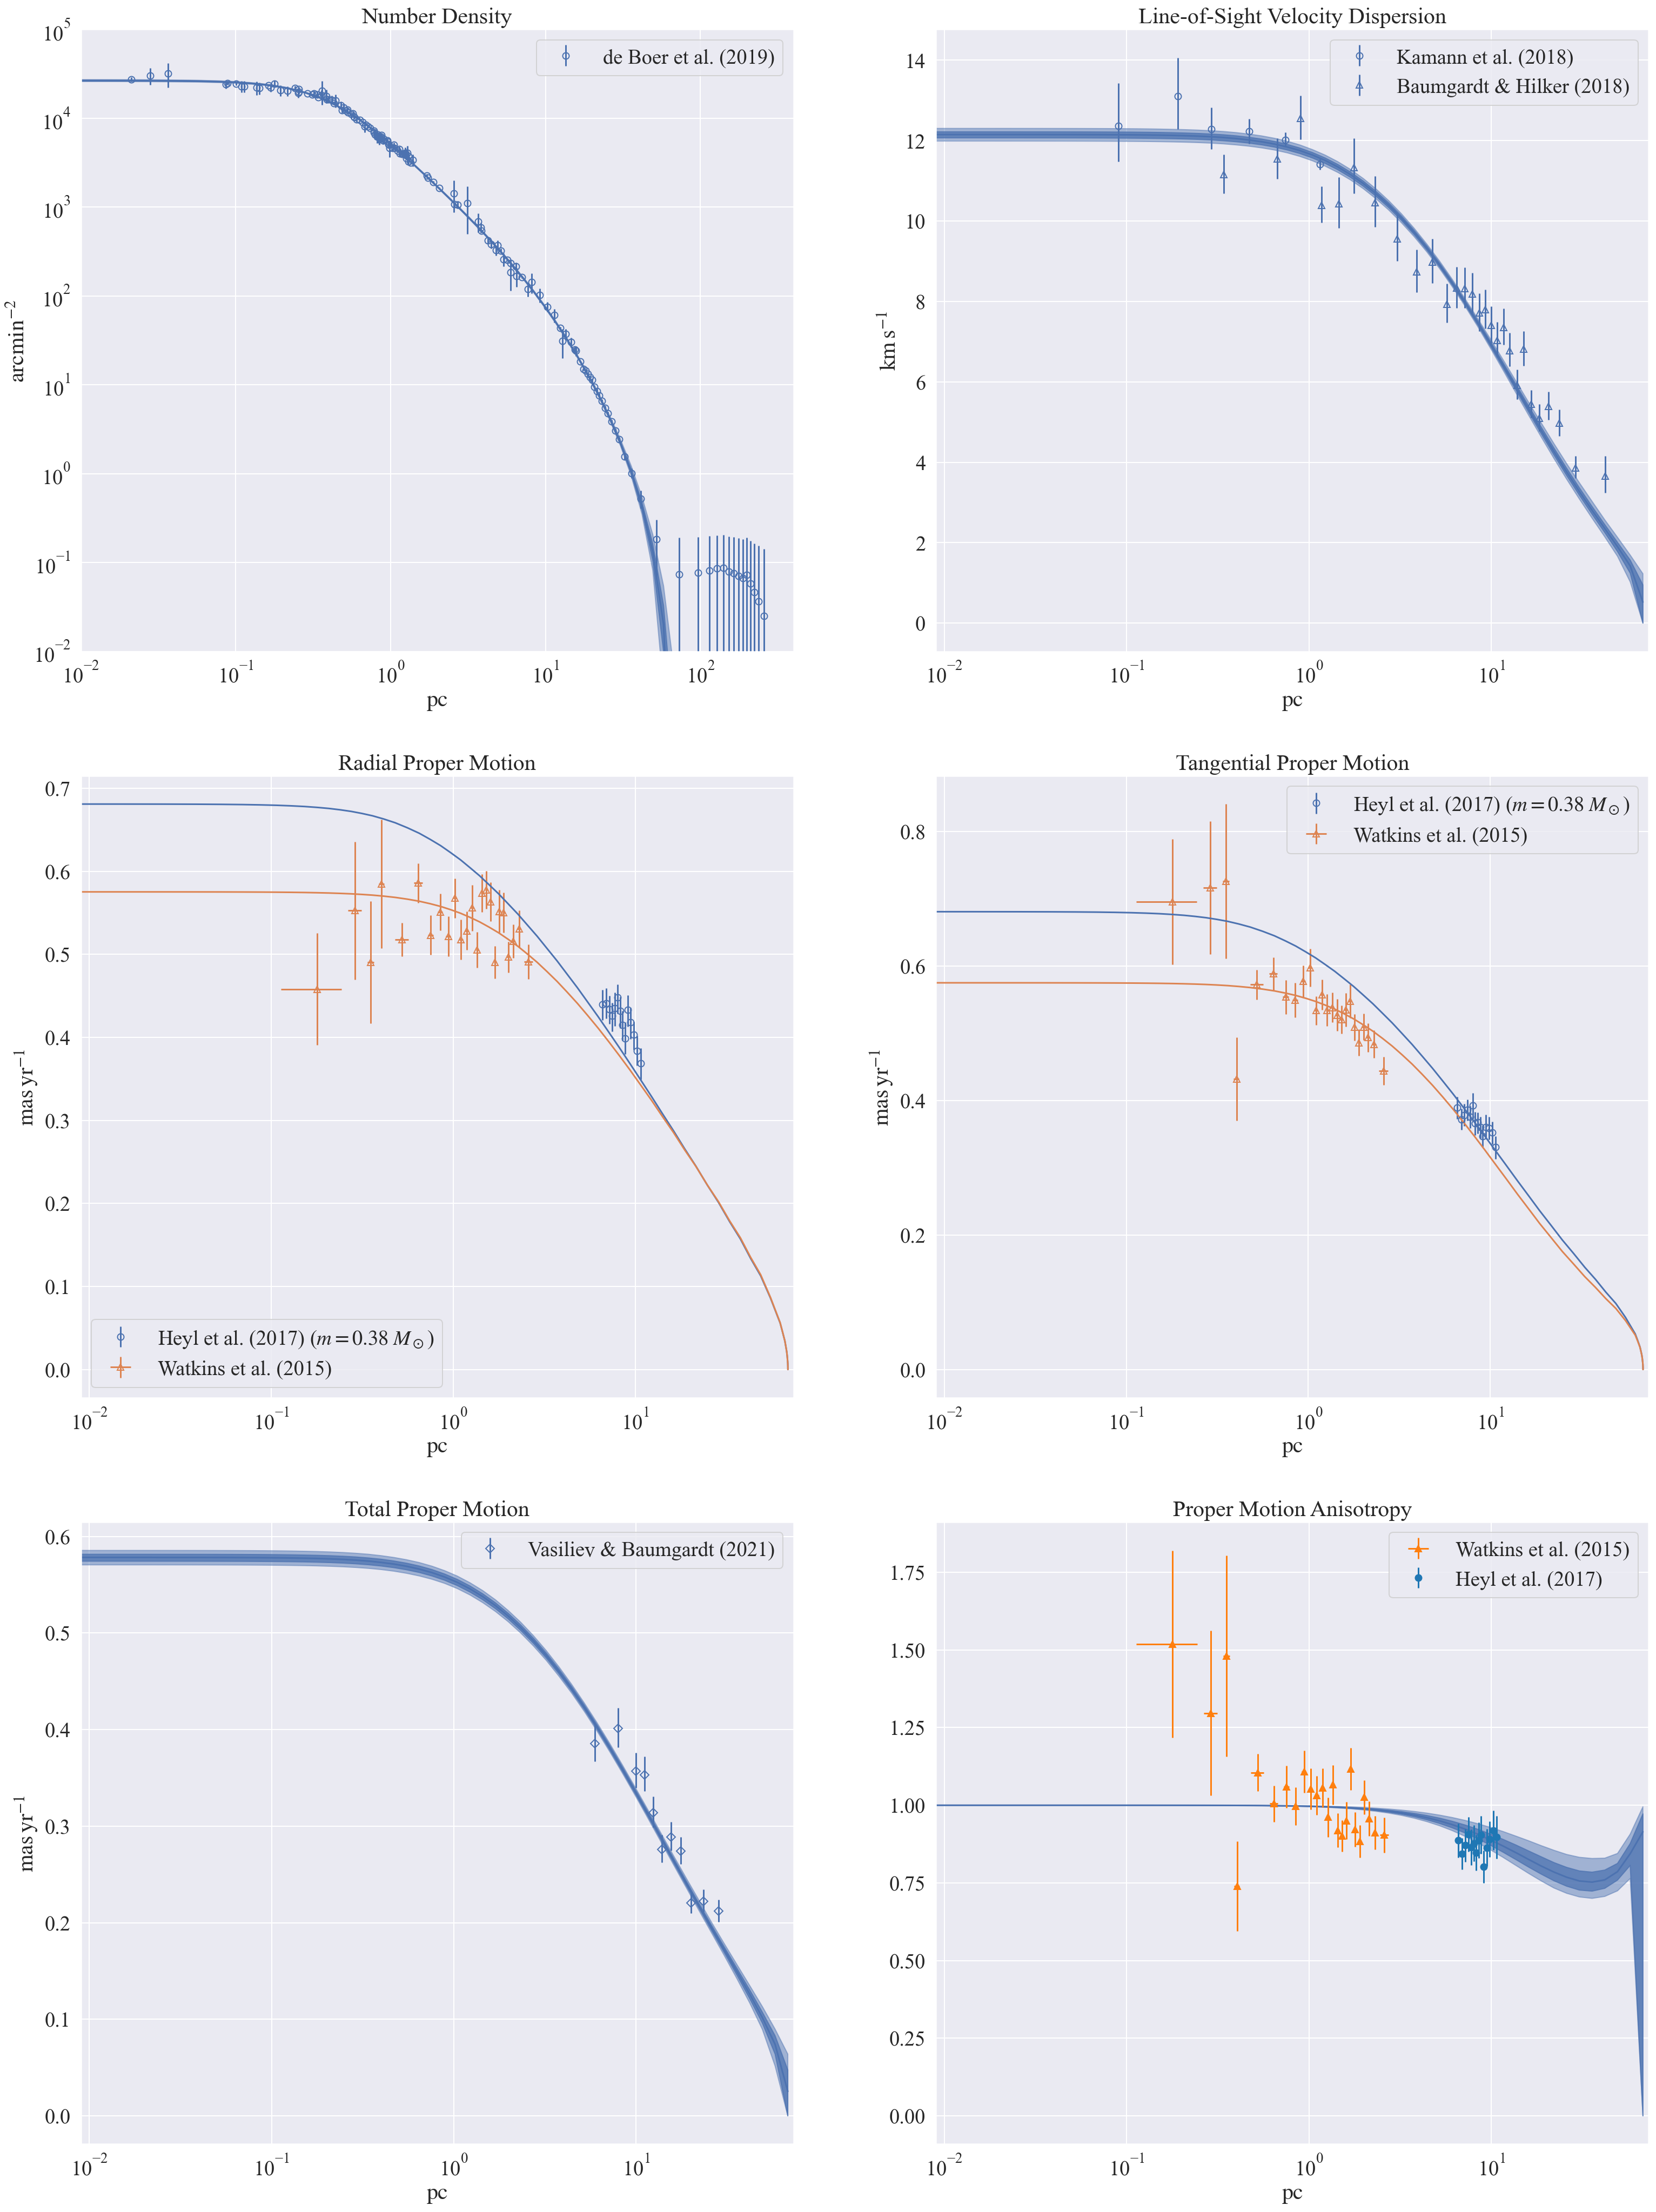

In [17]:
# giant 6 panel plot with all obs

fig, axes = plt.subplots(3, 2, figsize=(26, 36))
axes = axes.flatten()

plt.sca(axes[0])
civiz.plot_number_density(fig=fig, ax=axes[0], rescaled=False)
plt.legend()
fig.legends = []
plt.xlim(1e-2, 10**2.6)
plt.ylim(1e-2, 10**5)

plt.sca(axes[1])
civiz.plot_LOS(fig=fig, ax=axes[1])

# TODO: replace both of these with CI plots when bug is fixed
plt.sca(axes[2])
m.plot_pm_R(fig=fig, ax=axes[2])
# civiz.plot_pm_R(fig=fig, ax=axes[3])

plt.sca(axes[3])
m.plot_pm_T(fig=fig, ax=axes[3])
# civiz.plot_pm_T(fig=fig, ax=axes[3])


plt.sca(axes[4])
civiz.plot_pm_tot(fig=fig, ax=axes[4])

plt.sca(axes[5])
civiz.plot_pm_ratio(fig=fig, ax=axes[5])


# watkins data
y = (
    obs.datasets["proper_motion/watkins"].variables["PM_T"]
    / obs.datasets["proper_motion/watkins"].variables["PM_R"]
)

yerr = fitter.util.probabilities.div_error(
    obs.datasets["proper_motion/watkins"].variables["PM_T"],
    obs.datasets["proper_motion/watkins"].variables["ΔPM_T"],
    obs.datasets["proper_motion/watkins"].variables["PM_R"],
    obs.datasets["proper_motion/watkins"].variables["ΔPM_R"],
)

x = obs.datasets["proper_motion/watkins"].variables["r"].to(u.pc)
xerr = obs.datasets["proper_motion/watkins"].variables["Δr"].to(u.pc)

plt.errorbar(
    x,
    y,
    xerr=xerr,
    yerr=yerr,
    label="Watkins et al. (2015)",
    color="tab:orange",
    fmt="^",
)

# heyl data
y = (
    obs.datasets["proper_motion/heyl"].variables["PM_T"]
    / obs.datasets["proper_motion/heyl"].variables["PM_R"]
)

err_pmt = np.maximum(
    obs.datasets["proper_motion/heyl"].variables["ΔPM_T,up"],
    obs.datasets["proper_motion/heyl"].variables["ΔPM_T,down"],
)
err_pmr = np.maximum(
    obs.datasets["proper_motion/heyl"].variables["ΔPM_R,up"],
    obs.datasets["proper_motion/heyl"].variables["ΔPM_R,down"],
)


yerr = fitter.util.probabilities.div_error(
    obs.datasets["proper_motion/heyl"].variables["PM_T"],
    err_pmt,
    obs.datasets["proper_motion/heyl"].variables["PM_R"],
    err_pmr,
)

x = obs.datasets["proper_motion/heyl"].variables["r"].to(u.pc)

plt.errorbar(x, y, yerr=yerr, label="Heyl et al. (2017)", color="tab:blue", fmt="o")
plt.legend()

fig.savefig("obs_panel.png", bbox_inches="tight", dpi=300)
plt.show()

In [18]:
iter_rate = np.array(mcmcviz.file["statistics"]["iteration_rate"])

np.mean(iter_rate) = 62.380s


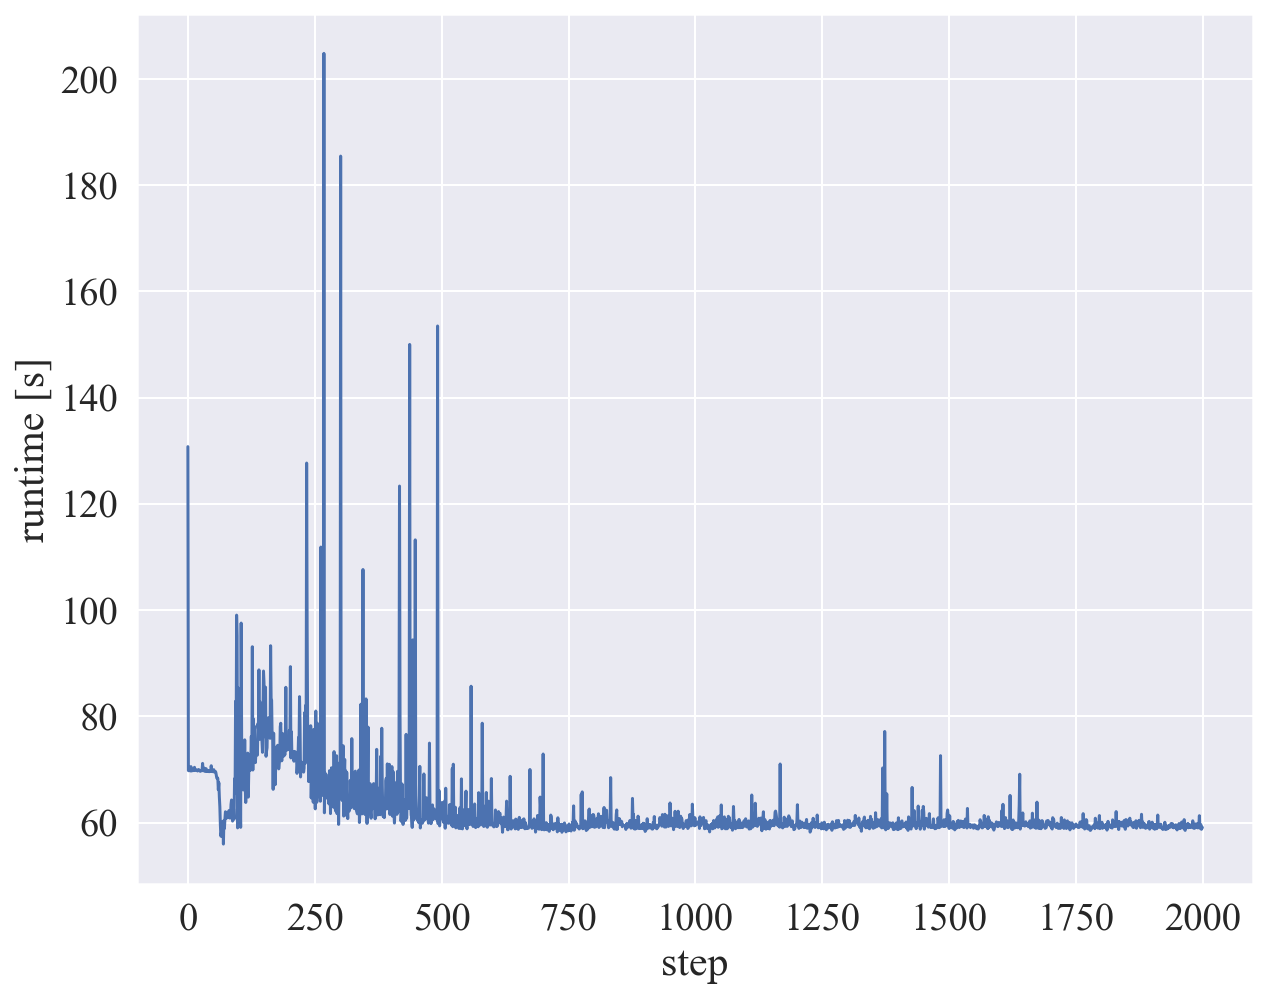

In [19]:
plt.figure(figsize=(10, 8))
plt.plot(iter_rate)
plt.xlabel("step")
plt.ylabel("runtime [s]")
print(f"{np.mean(iter_rate) = :.3f}s")

In [20]:
acc_rate = np.array(mcmcviz.file["statistics"]["acceptance_rate"])

np.mean(acc_rate) = 0.116


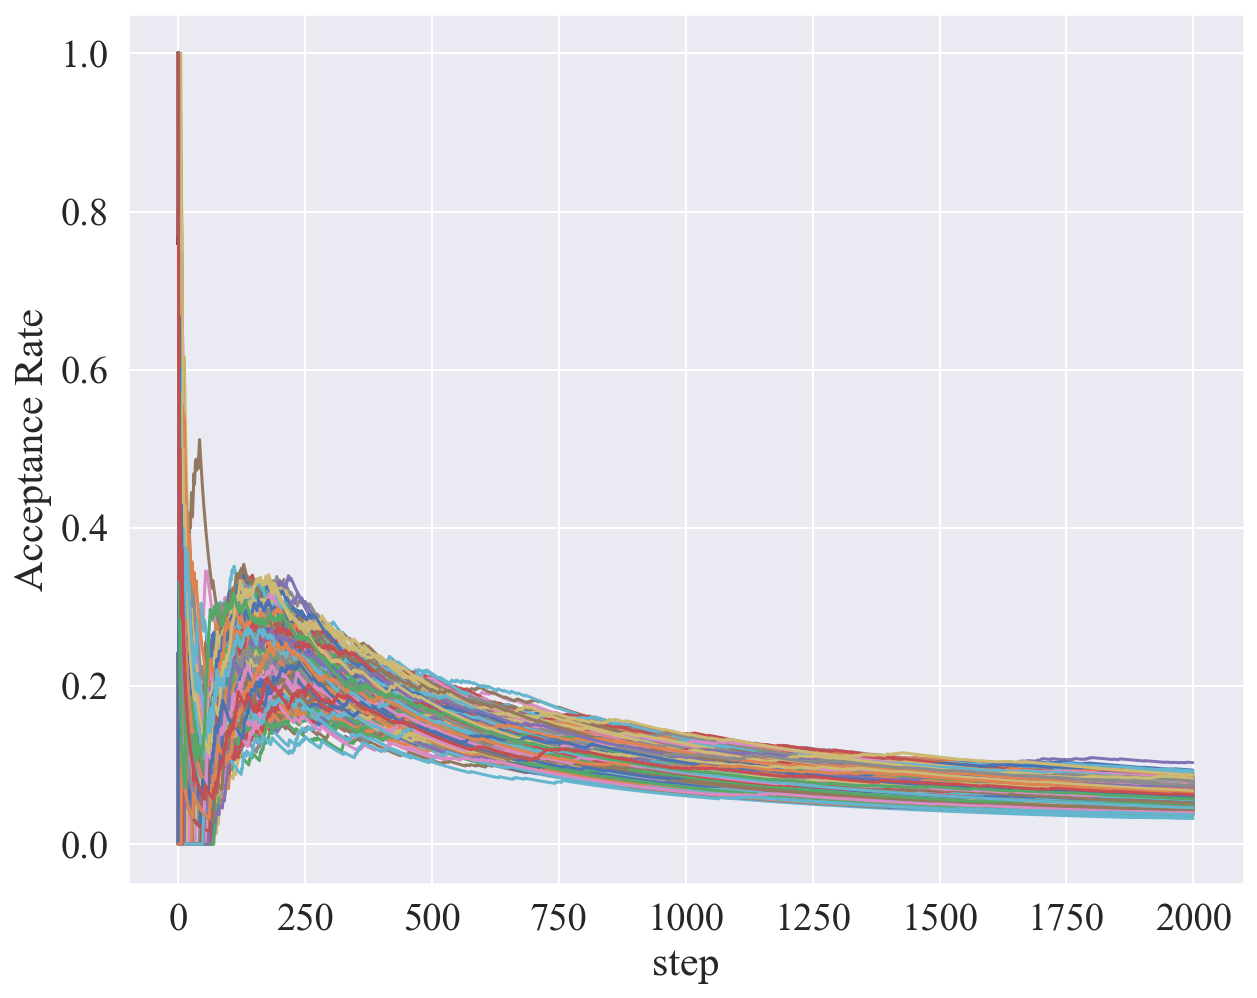

In [21]:
plt.figure(figsize=(10, 8))
plt.plot(acc_rate)
plt.xlabel("step")
plt.ylabel("Acceptance Rate")
print(f"{np.mean(acc_rate) = :.3f}")